In [2]:
import sys
import os
import matplotlib.pyplot as plt
sys.path.append("../")
import library as lib
import math
from tqdm.auto import tqdm

C:\Users\cdipt\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\cdipt\anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\cdipt\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
C:\Users\cdipt\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


# Question 1

In [3]:
guess1 = 1.5
guess2 = 2.5
#Considering that the fucntion
def f(x):
    return math.log(x/2) - math.sin((5*x)/2)
def f_p(x):
    return 1/x - 5*math.cos((5*x)/2)/2

In [4]:
root_regula,hist_regula,iter_regula = lib.root_finding.RootByRegulaFalsi(guess1=guess2,
                                               guess2=guess1,
                                               func=f,
                                               shift=0.5,
                                               eps=1e-6
                                              )

root_newton, iter_newton = lib.root_finding.RootByNewtonRalphson(guess = guess1,
                                                            func = f,
                                                            func_p = f_p,
                                                            eps = 1e-6)

In [5]:
print("-----------------------------------------------------------")
print(f"The root found by the regula falsi method is {root_regula}")
print(f"The value of f at the root is {f(root_regula)}")
print(f"The number of iterarions required to reach the root is {iter_regula}")
print("-----------------------------------------------------------")
print(f"The root found by the regula falsi method is {root_newton}")
print(f"The value of f at the root is {f(root_newton)}")
print(f"The number of iterarions required to reach the root is {iter_newton}")
print("-----------------------------------------------------------")

-----------------------------------------------------------
The root found by the regula falsi method is 3.528425236355925
The value of f at the root is -1.0248981274774138e-07
The number of iterarions required to reach the root is 11
-----------------------------------------------------------
The root found by the regula falsi method is 1.4019299316146128
The value of f at the root is -1.6653345369377348e-16
The number of iterarions required to reach the root is 4
-----------------------------------------------------------


### In this case we have found two different roots the reason being the existance of multiple roots in the given interval. Still we can notice that the newton ralphson method has achieved a higher level of convergence in lesser number of steps compared to the regula falsi when we have provided it with the exact derivative of the function.

# Question 2

In [6]:
L0 =0
Ln = 10
T0 = 40
Tn = 200
Ta = 20
guess =8
def dvdt(x,v,t,w=1,neu=0.15):
    return  - 0.01*(Ta-x)
def dxdt(v,t):
    return v

In [7]:
y,_,x =lib.differential_equation.Solution_Shooting_Runge_Kutta_4(dxdt,dvdt,L0,Ln,T0,Tn,guess)

In [8]:
#Finding the temperature closest to T =100
closest = 1e300
index = 0
for i in range(len(y)):
    if abs(y[i]-100)<closest:
        index = i
        closest = abs(y[i]-100)

In [9]:
print("The value fo x at which T is 100 is",x[index])

The value fo x at which T is 100 is 4.42999999999995


# Question 3

In [17]:
import numpy as np # Using numpy for inversion and Tridiagonal matrix
from scipy.sparse import diags
import pandas as pd
#The following code is completely done using numpy since native python is extremly slow and will take 
#orders of magnitude more time to solve
z = 1
x_discreetisation = 0.0009
t_discreetisation = 1e-8
x_range = (0,2)
t_range = (0,0.095)
X = np.arange(x_range[0],x_range[-1],x_discreetisation)[:,None]
V_0 = np.zeros(X.shape)
V_0[int(V_0.shape[0]/2)] = 300
n = V_0.shape[0]
B = diags([-1*np.ones(n-1),2*np.ones(n),-1*np.ones(n-1)],[-1,0,1]).toarray()
alpha = t_discreetisation/(x_discreetisation)**2

In [18]:
V = []
V.append(V_0)
for t in tqdm(range(500)):
    V.append(np.matmul(np.matmul(np.linalg.inv(2*z*np.eye(n) + alpha*B),(2*z*np.eye(n) - alpha*B)),V[t]))

  0%|          | 0/500 [00:00<?, ?it/s]

In [19]:
V_grid = np.concatenate(V,axis = -1)

In [20]:
alpha

0.01234567901234568

In [21]:
V_grid.shape

(2223, 501)

Text(0, 0.5, 'Length (x)')

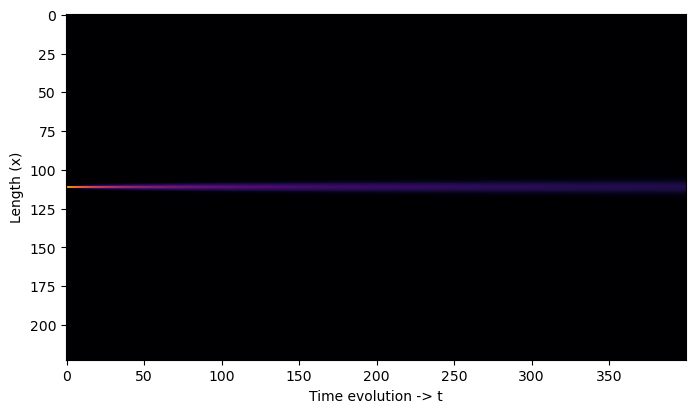

In [35]:
plt.figure(figsize=(8,8))
plt.imshow(V_grid[1000:-1000,:400], cmap="inferno")
plt.xlabel("Time evolution -> t")
plt.ylabel("Length (x)")

In [16]:
V_0.shape

(2223, 1)

Text(0, 0.5, 'Temperature T')

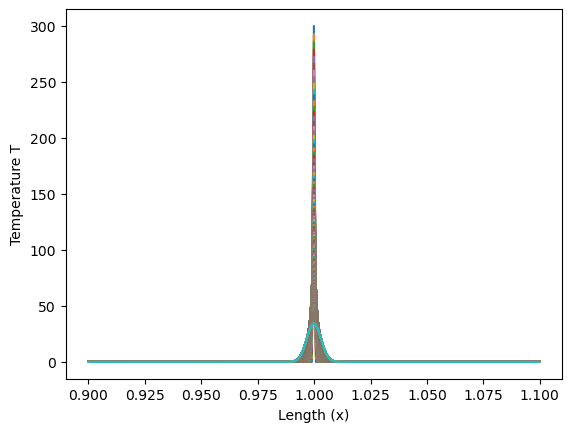

In [32]:
for i in range(500):
    plt.plot(X[1000:-1000],V_grid[1000:-1000,i])
plt.xlabel("Length (x)")
plt.ylabel("Temperature T")

# Question 4

In [113]:
# If we have a beam of mass density lambda, and length of 2m 
# Using Simpson method to do the computations
def mass_density(x):
    return x**2
def integrand2(x):
    return mass_density(x)*x
Lower_bound = 0
Upper_bound = 2

print("Using Simpson method")
m = lib.integrate(mass_density, 10, Lower_bound,Upper_bound, mode = "simpson")
x_cm = lib.integrate(integrand2, 10, Lower_bound,Upper_bound, mode = "simpson")/m
print("The centre of mass of the rod is ","{:.4f}".format(x_cm))


Using Simpson method
The centre of mass of the rod is  1.5000


# Question 5

In [166]:
matrix,vector = lib.io.reader("./inputQ5.txt")
matrix = lib.matrix.matrix(matrix)

In [167]:
print(matrix)
print(vector)

 1.0	-1.0	 4.0	 0.0	 2.0	 9.0	
 0.0	 5.0	-2.0	 7.0	 8.0	 4.0	
 1.0	 0.0	 5.0	 7.0	 3.0	-2.0	
 6.0	-1.0	 2.0	 3.0	 0.0	 8.0	
-4.0	 2.0	 0.0	 5.0	-5.0	 3.0	
 0.0	 7.0	-1.0	 5.0	 4.0	-2.0	

[19.0, 2.0, 13.0, -7.0, -9.0, 2.0]


In [169]:
x,y = lib.linear.lu_solver(matrix,vector)
print(y)

[-1.7618170439978567, 0.8962280338740136, 4.051931404116157, -1.6171308025395428, 2.041913538501914, 0.15183248715593495]
